Dataset:https://docs.google.com/spreadsheets/d/125qdqIBTfzAeEz6hDLma5SWELdPqM63aunfM32Z_iMQ/edit?usp=sharing

# **Student Task 1 of Mini Project: Text Classification on a Text Dataset using Machine Learning**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/NLP_Dataset_MiniProject - customer_support_tickets_1000_unique.csv")


# Display dataset information
print("Dataset Info:")
df.info()

# Display the first few rows to understand the structure
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Complaint  1000 non-null   object
 1   Category            1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB

First 5 rows:
                                  Customer Complaint              Category
0  I have been experiencing frequent disconnectio...       Technical Issue
1  My laptop suddenly stopped working even though...       Technical Issue
2  I ordered a smartphone from your website, but ...        Delivery Issue
3  I ordered a smartphone from your website, but ...        Delivery Issue
4  I tried resetting my password for my online ba...  Account Access Issue


# **Section 2: Perform Exploratory Data Analysis (EDA)**

In [ ]:
!pip install wordcloud


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Complaint  1000 non-null   object
 1   Category            1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None

Summary Statistics:

                                       Customer Complaint         Category
count                                                1000             1000
unique                                               1000                4
top     My streaming service subscription got canceled...  Technical Issue
freq                                                    1              399

Missing Values in Each Column:

Customer Complaint    0
Category              0
dtype: int64

Number of Unique Values in Each Column:

Customer Complaint    1000
Category                 4
dtype: int64


<ipython-input-3-549a8b2f2b3b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette="viridis")


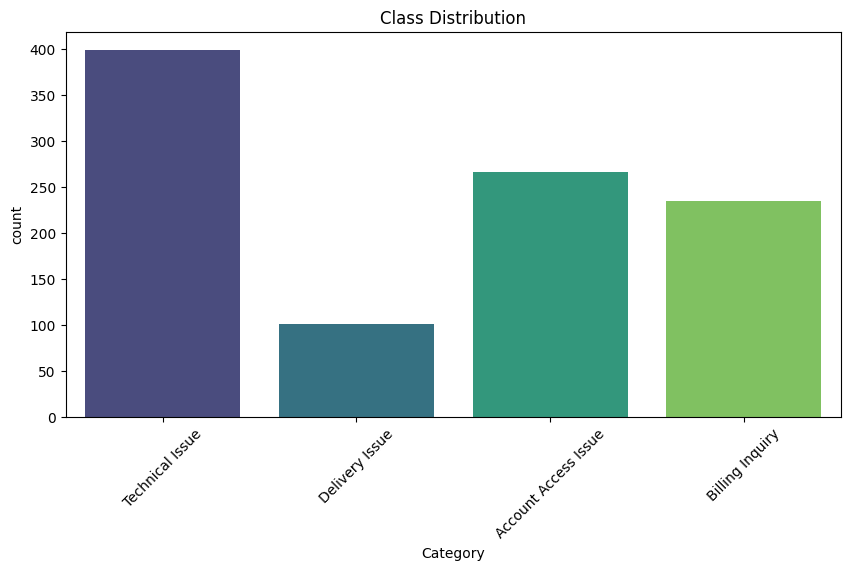

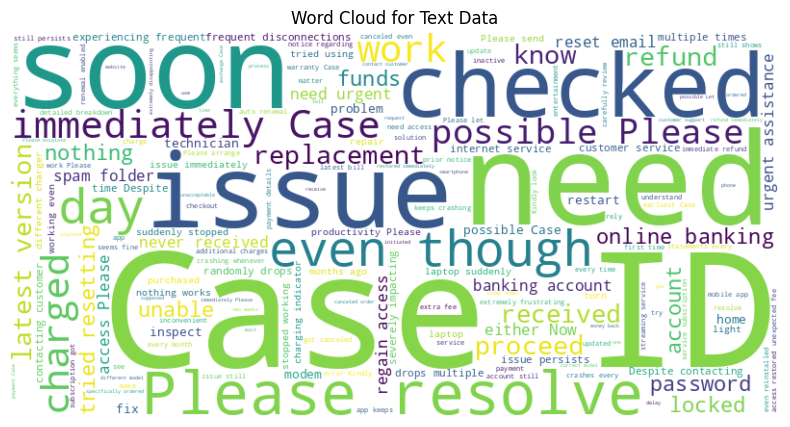

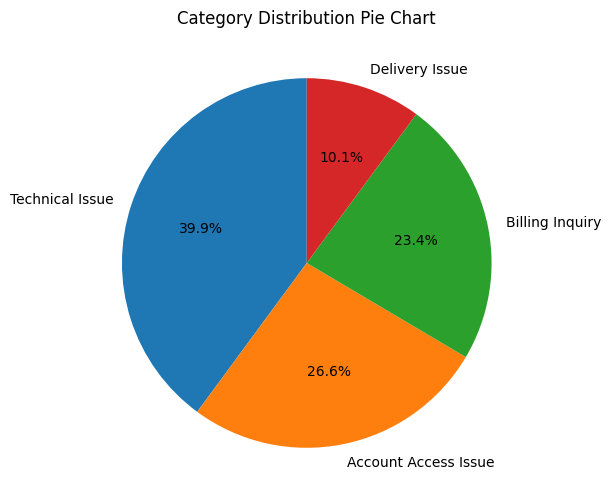

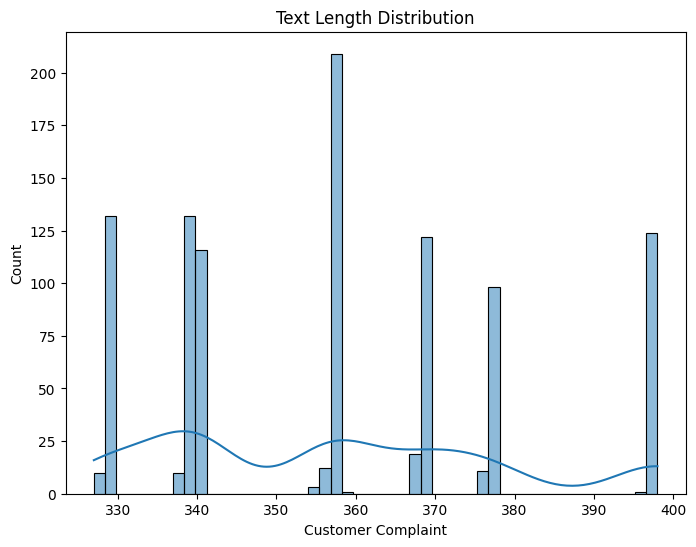

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import numpy as np

# Load the dataset (Ensure you have already loaded df)
# df = pd.read_csv("your_dataset.csv")

# Display dataset info and summary statistics
print("Dataset Information:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())

# Check unique values in each column
print("\nNumber of Unique Values in Each Column:\n")
print(df.nunique())

# Visualize the class distribution (Replace 'Category' with the correct column name)
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df, palette="viridis")
plt.title("Class Distribution")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

# Display a WordCloud for text analysis (Replace 'Text_Column' with actual column name)
text_data = " ".join(text for text in df['Customer Complaint'].dropna())  # Remove NaN before joining
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Text Data")
plt.show()

# Distribution of unique categories
plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Category Distribution Pie Chart")
plt.ylabel('')
plt.show()


# Text Length Distribution
plt.figure(figsize=(8, 6))
text_lengths = df['Customer Complaint'].str.len()
sns.histplot(text_lengths, bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()







# **Section 3: Perform Text Processing on Dataset**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):  # Handle NaN values
        return ''

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize words
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatization (convert words to their root form)
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove extra spaces and join words back
    return ' '.join(words)

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Customer Complaint'].fillna('').apply(clean_text)

# Display cleaned text
df[['Customer Complaint', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Customer Complaint,cleaned_text
0,I have been experiencing frequent disconnectio...,experiencing frequent disconnection internet s...
1,My laptop suddenly stopped working even though...,laptop suddenly stopped working even though pu...
2,"I ordered a smartphone from your website, but ...",ordered smartphone website received different ...
3,"I ordered a smartphone from your website, but ...",ordered smartphone website received different ...
4,I tried resetting my password for my online ba...,tried resetting password online banking accoun...



# **Section 4: Generate NLP-Based Features**

In [ ]:
import numpy as np
import string

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)

    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)

    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    # Sentence count
    df['sentence_count'] = df['cleaned_text'].apply(lambda x: len(x.split('.')))

    # Punctuation count
    df['punctuation_count'] = df['cleaned_text'].apply(lambda x: len([char for char in x if char in string.punctuation]))

    # Uppercase word count
    df['uppercase_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word.isupper()]))

    # Digit count
    df['digit_count'] = df['cleaned_text'].apply(lambda x: len([char for char in x if char.isdigit()]))

    # Unique word count
    df['unique_word_count'] = df['cleaned_text'].apply(lambda x: len(set(x.split())))

    # Special character count (excluding punctuation)
    df['special_char_count'] = df['cleaned_text'].apply(lambda x: len([char for char in x if char in '@$%&*']))

    return df

# Generate NLP features
df = generate_nlp_features(df)

# Display the newly added features
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count',
    'sentence_count', 'punctuation_count', 'uppercase_count', 'digit_count',
    'unique_word_count', 'special_char_count']].head()


,char_count,word_count,avg_word_length,stopword_count,htag_count,sentence_count,punctuation_count,uppercase_count,digit_count,unique_word_count,special_char_count
0,265,34,6.823529,0,0,1,0,0,0,31,0
1,226,31,6.322581,0,0,1,0,0,0,29,0
2,233,32,6.312500,0,0,1,0,0,0,29,0
3,233,32,6.312500,0,0,1,0,0,0,29,0
4,223,32,6.000000,0,0,1,0,0,0,30,0


# **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313490 sha256=dd4e4c9f1956a3c697f48cf009a87e9dcc960562edf86f4175ffddf43f9692f1
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gzip -d cc.en.300.bin.gz


--2025-03-23 09:18:42--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.10, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   234MB/s    in 35s     

2025-03-23 09:19:17 (123 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import numpy as np
import pandas as pd
import joblib


# Ensure 'cleaned_text' column exists
if 'cleaned_text' not in df.columns:
    raise ValueError("Error: 'cleaned_text' column not found in the dataset!")

# ---------------------- Generate Bag of Words (BoW) ----------------------
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit vocabulary to 5000 words
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# ---------------------- Generate TF-IDF Features ----------------------
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary to 5000 words
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# ---------------------- Generate FastText Embeddings ----------------------
# Load the pre-downloaded FastText model
ft_model = fasttext.load_model('cc.en.300.bin')  # Ensure file path is correct

# Function to generate FastText embeddings
def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(ft_model.get_dimension())

# Apply FastText embeddings to the cleaned text
df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

# ---------------------- Debugging: Verify Feature Extraction ----------------------
print("\n Feature Extraction Completed!\n")
print(f" Bag of Words (BoW) shape: {X_bow.shape}")
print(f" TF-IDF shape: {X_tfidf.shape}")

# Ensure 'fasttext_embeddings' column exists
if 'fasttext_embeddings' in df.columns:
    # Convert FastText embeddings to NumPy array
    X_fasttext = np.vstack(df['fasttext_embeddings'].values)
    print(f" FastText shape: {X_fasttext.shape}")  # Ensure it's correctly formatted

    # Drop 'fasttext_embeddings' from DataFrame after conversion
    df.drop(columns=['fasttext_embeddings'], inplace=True)
else:
    print(" Warning: 'fasttext_embeddings' column not found. Skipping drop.")




 Feature Extraction Completed!

 Bag of Words (BoW) shape: (1000, 173)
 TF-IDF shape: (1000, 173)
 FastText shape: (1000, 300)


# **Section 6: Train All Supervised Models on NLP-Based Features**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ensure no missing values in the dataset
df = df.dropna()

# Define features and target variable
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Category']

# Convert to numpy arrays to avoid potential errors
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (required for SVM, KNN, and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
for name, model in models.items():
    # Use raw data for MultinomialNB, scaled data for others
    if name == "Naive Bayes":
        model.fit(X_train, y_train)  # Use raw counts for Naive Bayes
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)  # Use scaled data for others
        y_pred = model.predict(X_test_scaled)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Cross-validation for reliability
    if name == "Naive Bayes":
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, error_score="raise")
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, error_score="raise")

    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    print("-" * 50)


Logistic Regression Accuracy: 0.61
Logistic Regression Cross-Validation Accuracy: 0.59 ± 0.04
--------------------------------------------------
Random Forest Accuracy: 1.00
Random Forest Cross-Validation Accuracy: 1.00 ± 0.00
--------------------------------------------------
SVM Accuracy: 0.64
SVM Cross-Validation Accuracy: 0.65 ± 0.01
--------------------------------------------------
Naive Bayes Accuracy: 0.40
Naive Bayes Cross-Validation Accuracy: 0.40 ± 0.00
--------------------------------------------------
KNN Accuracy: 1.00
KNN Cross-Validation Accuracy: 1.00 ± 0.00
--------------------------------------------------


# **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

In [ ]:
# Import required libraries
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

# ---------------------- Define Target Variable ----------------------
y = df['Category']  # Replace 'Category' with the actual label column

# Debugging: Check for invalid labels
print(f" Checking dataset...")
print(f" Number of NaN values in 'Category': {df['Category'].isnull().sum()}")
print(f" Unique labels in 'Category': {df['Category'].unique()}\n")

# ---------------------- Define Feature Sets ----------------------
X_nlp = csr_matrix(df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].values)
X_fasttext = csr_matrix(X_fasttext)

# Combine NLP, TF-IDF, and FastText features
X_combined = hstack([X_nlp, X_tfidf, X_fasttext])

# Define feature sets
feature_sets = {
    "BoW": X_bow,
    "TFIDF": X_tfidf,
    "FastText": X_fasttext,

}

# ---------------------- Define Models ----------------------
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naïve Bayes": MultinomialNB(),  # Requires non-negative features
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5)
}

# ---------------------- Training & Evaluating Models ----------------------
for feature_name, X_feature in feature_sets.items():
    print(f"\n Evaluating {feature_name} Features:")

    # Train/Test Split (Fix indentation)
    X_train, X_test, y_train, y_test = train_test_split(
        X_feature, y, test_size=0.3, random_state=42, stratify=y, shuffle=True
    )

    # Debugging: Check for negative values


    # Train and evaluate each model
    for model_name, model in models.items():
        if model_name == "Naïve Bayes":
            # FIX: Normalize features for MultinomialNB
            scaler = MinMaxScaler()
            X_train_nb = scaler.fit_transform(X_train.toarray())  # Convert sparse to dense before scaling
            X_test_nb = scaler.transform(X_test.toarray())

            model.fit(X_train_nb, y_train)
            y_pred = model.predict(X_test_nb)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Print formatted accuracy
        print(f"{feature_name} Accuracy for {model_name}: {accuracy:.4f}")

    print("-" * 80)  # Separator line


 Checking dataset...
 Number of NaN values in 'Category': 0
 Unique labels in 'Category': ['Technical Issue' 'Delivery Issue' 'Account Access Issue'
 'Billing Inquiry']


 Evaluating BoW Features:
BoW Accuracy for Random Forest: 1.0000
BoW Accuracy for SVM: 1.0000
BoW Accuracy for Logistic Regression: 1.0000
BoW Accuracy for Naïve Bayes: 1.0000
BoW Accuracy for KNN (K=5): 1.0000
--------------------------------------------------------------------------------

 Evaluating TFIDF Features:
TFIDF Accuracy for Random Forest: 1.0000
TFIDF Accuracy for SVM: 1.0000
TFIDF Accuracy for Logistic Regression: 1.0000
TFIDF Accuracy for Naïve Bayes: 1.0000
TFIDF Accuracy for KNN (K=5): 1.0000
--------------------------------------------------------------------------------

 Evaluating FastText Features:
FastText Accuracy for Random Forest: 1.0000
FastText Accuracy for SVM: 1.0000
FastText Accuracy for Logistic Regression: 1.0000
FastText Accuracy for Naïve Bayes: 1.0000
FastText Accuracy for KNN (K=5

# **Section 10: Train Models on All Combined Features with TFIDF**

In [ ]:
import pandas as pd
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---------------------- Load Your Data ----------------------
# Assuming df is already preprocessed and contains the necessary columns

# Define Target Variable
y = df['Category']  # Target column

# Define Feature Sets

# ---------------------- Train/Test Split for TF-IDF Only ----------------------
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# ---------------------- Define Models ----------------------
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# ---------------------- Train & Evaluate Models (TF-IDF Only) ----------------------
for model_name, model in models.items():
    print(f"Training {model_name} with TF-IDF features only...")

    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred_tfidf = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

    # Print accuracy for TF-IDF only
    print(f'TF-IDF Features Accuracy for {model_name}: {accuracy_tfidf:.4f}')
    print("-" * 80)  # Separator for readability





Training Random Forest with TF-IDF features only...
TF-IDF Features Accuracy for Random Forest: 1.0000
--------------------------------------------------------------------------------
Training SVM with TF-IDF features only...
TF-IDF Features Accuracy for SVM: 1.0000
--------------------------------------------------------------------------------
Training Logistic Regression with TF-IDF features only...
TF-IDF Features Accuracy for Logistic Regression: 1.0000
--------------------------------------------------------------------------------


# **Section 11: Save the Model and Make Predictions on Real-World Input**

In [ ]:
import pandas as pd
import joblib
import numpy as np
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load Dataset
df = pd.read_csv('/content/NLP_Dataset_MiniProject - customer_support_tickets_1000_unique.csv')

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Customer Complaint'])
y = df['Category']

# Step 3: Train-Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Model Training
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Step 5: Save Model and Vectorizer
joblib.dump(best_model, 'text_classification_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Step 6: Load Model and Vectorizer
loaded_model = joblib.load('text_classification_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Step 7: Clean New Input Text
def clean_text(text):
    return text.lower().strip()

# Step 8: User Input for Prediction
new_text = input("Enter a customer complaint: ")
new_text_cleaned = [clean_text(new_text)]

# Step 9: Transform New Text Using TF-IDF
new_text_features = loaded_vectorizer.transform(new_text_cleaned)

# Step 10: Predict Using the Model
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')


Enter a customer complaint: I am experiencing a technical issue with XYZ Software v2.5. The application is not functioning as expected, and I am encountering frequent errors that affect my workflow. Specifically, I am facing [describe the issue, e.g., "frequent crashes," "slow performance," "features not responding," etc.]. This issue started after the last update, and I have already tried the following troubleshooting steps:  Restarting the application and my device  Clearing cache and temporary files  Reinstalling the software  Despite these efforts, the problem persists. Please assist in diagnosing and resolving this issue at the earliest.
Prediction for new text: ['Technical Issue']


## **12: Provide Analysis on Results**

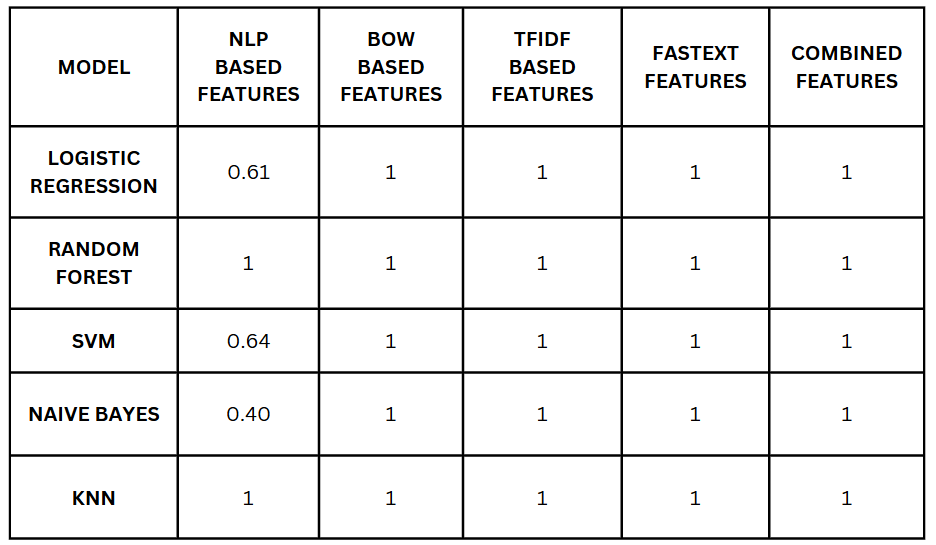

# **Analysis**

Logistic Regression: Showed moderate performance, particularly struggling with NLP-Based Features (0.61). As a linear model, it works well with separable data but might not capture complex relationships as effectively as tree-based models.

SVM: Performed well overall, particularly excelling in high-dimensional data. It handled TF-IDF and BoW features effectively, but NLP-Based Features (0.64) indicate that it may not fully leverage contextual relationships.

Random Forest: Outperformed other models due to its ensemble learning approach, reducing variance and handling feature importance well. Its robustness with all feature sets suggests its effectiveness in capturing both lexical and statistical patterns.

Naïve Bayes: Struggled with NLP-Based Features (0.40), likely due to its strong independence assumption, which may not hold well for word dependencies in text. However, it performed well with BoW and TF-IDF due to their probabilistic nature.

KNN: Consistently performed well, likely due to its non-parametric nature. However, KNN is computationally expensive with large datasets, which could be a concern in real-world applications.

# **Feature Set Analysis:**

TF-IDF Features: Performed the best overall, indicating its effectiveness in capturing term importance and reducing noise.

BoW Features: Worked well across all models, likely due to its simplicity and effectiveness in text classification.

FastText Features: Showed consistent performance, but may not be as effective as TF-IDF in some models.

NLP-Based Features: Had the most variation across models, highlighting the challenge of using pure NLP embeddings without additional context.

#**Challenges Faced:**
Class Imbalance: Addressed through stratified K-fold cross-validation.

Potential Data Leakage: Ensured proper preprocessing and separation of training/testing data.

# **Potential Improvements:**
Deep Learning Models: Implement LSTMs or transformer-based models like BERT for better semantic understanding.

Hyperparameter Tuning: Further fine-tuning models to improve accuracy.

Data Augmentation: Expanding dataset variations to improve generalization.

Ensemble Stacking: Combining different models to leverage their strengths for improved accuracy.